In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


## MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_test)

10000

In [ ]:
len(x_train)

60000

In [ ]:
n = 80
X = x_train[n]
Y = y_train[n]

In [ ]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 138,
        201, 253, 255, 232, 107,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 219, 252,
        252, 210, 207, 214, 252, 119,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

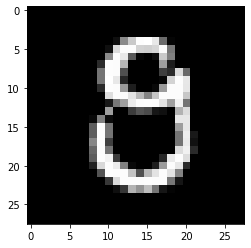

In [ ]:
plt.imshow(X,cmap='gray')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train[n]

9

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Step1

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, 
          batch_size=128, #要多少筆才要調參數 --> 就像做習題時，我們想做幾題，就看答案檢討
          epochs=8) 

Epoch 1/8
469/469 [==============================] - 4s 8ms/step - loss: 0.2540 - accuracy: 0.9271
Epoch 2/8
469/469 [==============================] - 4s 8ms/step - loss: 0.1042 - accuracy: 0.9692
Epoch 3/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0691 - accuracy: 0.9795
Epoch 4/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0500 - accuracy: 0.9852
Epoch 5/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9890
Epoch 6/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0286 - accuracy: 0.9917
Epoch 7/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0216 - accuracy: 0.9942
Epoch 8/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0173 - accuracy: 0.9951


### test2

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=SGD(lr=0.09),
        loss='mse',
        metrics=['accuracy']) #過程想看到正確率

In [ ]:
model.fit(x_train, y_train, 
          batch_size=128, #要多少筆才要調參數 --> 就像做習題時，我們想做幾題，就看答案檢討
          epochs=4)

Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0765 - accuracy: 0.4474
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0449 - accuracy: 0.7810
Epoch 3/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0300 - accuracy: 0.8492
Epoch 4/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0242 - accuracy: 0.8691


### test3

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
        loss='mse',
        metrics=['accuracy']) #過程想看到正確率
model.fit(x_train, y_train, 
          batch_size=128, #要多少筆才要調參數 --> 就像做習題時，我們想做幾題，就看答案檢討
          epochs=4)        

Epoch 1/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0122 - accuracy: 0.9212
Epoch 2/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0054 - accuracy: 0.9663
Epoch 3/4
469/469 [==============================] - 4s 8ms/step - loss: 0.0037 - accuracy: 0.9771
Epoch 4/4
469/469 [==============================] - 4s 8ms/step - loss: 0.0028 - accuracy: 0.9829


## optimizer

- 一般來說 `RMSprop` 會是一個不錯的選擇


In [ ]:
# 看目前的 model長什麼樣子
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, 
          batch_size=100, #要多少筆才要調參數 --> 就像做習題時，我們想做幾題，就看答案檢討
          epochs=10) 

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0838 - accuracy: 0.2973
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0549 - accuracy: 0.6766
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0277 - accuracy: 0.8450
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0197 - accuracy: 0.8824
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0167 - accuracy: 0.8965
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0151 - accuracy: 0.9045
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0140 - accuracy: 0.9113
Epoch 8/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0132 - accuracy: 0.9160
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0125 - accuracy: 0.9204
Epoch 10/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0120 - accuracy: 0.9238

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9281


[0.011352688074111938, 0.9280999898910522]

In [ ]:
model.save('my_nn.h5')